# Requirements 📋✅

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
# import cv2

# Needed for the data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Needed for the CNN
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.utils import to_categorical


2023-11-29 15:27:29.300531: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-29 15:27:29.591792: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-29 15:27:29.591833: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-29 15:27:29.645147: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-29 15:27:29.760948: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-29 15:27:29.763725: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [6]:
from tensorflow.keras.callbacks import EarlyStopping


In [7]:
from tensorflow import convert_to_tensor


# Hopefully fixing cuda

In [8]:
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"


In [9]:
!echo $CUDA_VISIBLE_DEVICES


-1


# The Dataset location 📍

## Label Data Load ⏳

In [10]:
labels = pd.read_csv(os.path.join('/home/kyrill/code/kvkirya/pt-ai/', 'raw_data/tmp_y_labels/tmp_labels.csv'))


In [11]:
labels


,Pose
0,0
1,0
2,1
3,1
4,1
5,2
6,2
7,1
8,2
9,0


## Loading of the image data 🖼️

In [12]:
path_img = '/home/kyrill/code/kvkirya/pt-ai/raw_data/tmp_X_images'
images_list = []
for images in os.listdir(path_img):
    if(images.endswith('.png')):
        images_list.append(images)


In [13]:
# Get the Filenames of the images in the folder
images_list


['00030620.rgb.png',
 '00030644.rgb.png',
 '00030732.rgb.png',
 '00030690.rgb.png',
 '00030543.rgb.png',
 '00030650.rgb.png',
 '00030567.rgb.png',
 '00030565.rgb.png',
 '00030001.rgb.png',
 '00030686.rgb.png']

In [14]:
# Join path of the images in the list with the main path to the image folder
import matplotlib.image as mpimg
img = mpimg.imread(os.path.join(path_img + f'/{images_list[1]}'))


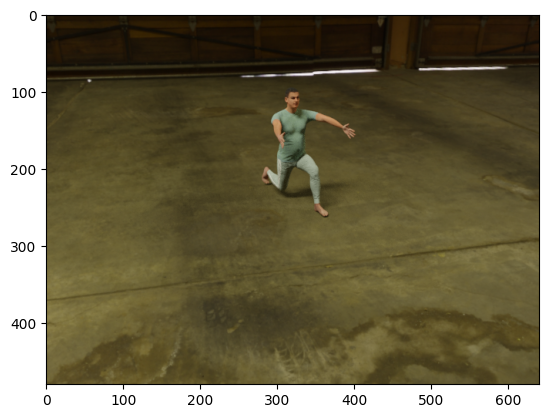

In [15]:
# plot image
plt.imshow(img)


In [16]:
# Create correctly formated images by looping through immage list
# and applying the same process as before

working_imgs = []
for i in images_list:
    img = mpimg.imread(os.path.join(path_img + f'/{i}'))
    working_imgs.append(img)


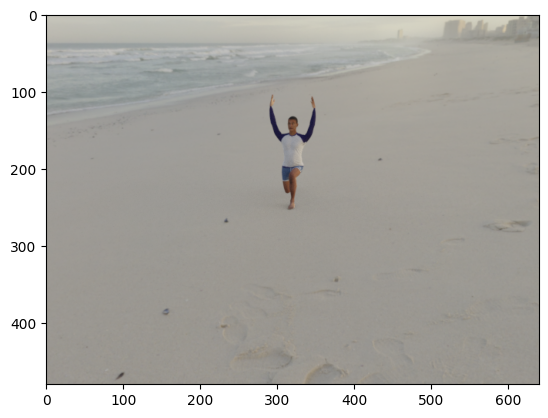

In [17]:
plt.imshow(working_imgs[3])


In [18]:
X_train, X_test = train_test_split(working_imgs, test_size=0.2, random_state=42)
y_train, y_test = train_test_split(labels, test_size=0.2, random_state=42)


In [19]:
# Transform the training images into np.arrays to use easier
X_train = np.array(X_train)
X_test = np.array(X_test)


In [20]:
# Check the different shapes
(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)


(((8, 480, 640, 4), (8, 1)), ((2, 480, 640, 4), (2, 1)))

In [21]:
X_train.shape


(8, 480, 640, 4)

## Exploring the Dataset 🧭🔍

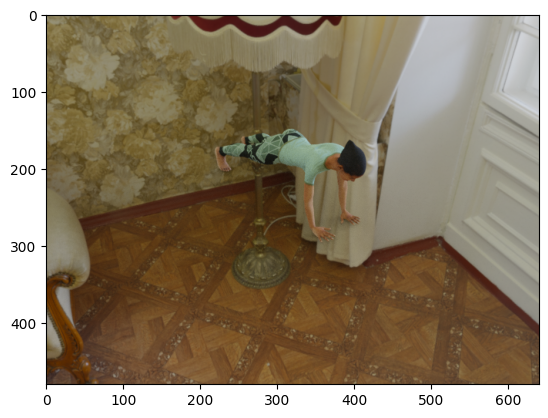

In [22]:
# Check whether the X_train contains immages
plt.imshow(X_train[7])


## Preprocessing ⚙️

In [23]:
X_train[:,:,4]


array([[[0.4392157 , 0.32156864, 0.10196079, 1.        ],
        [0.44313726, 0.32156864, 0.09803922, 1.        ],
        [0.44313726, 0.32156864, 0.10196079, 1.        ],
        ...,
        [0.39607844, 0.3529412 , 0.18431373, 1.        ],
        [0.38039216, 0.3372549 , 0.17254902, 1.        ],
        [0.38039216, 0.3372549 , 0.17254902, 1.        ]],

       [[0.7490196 , 0.75686276, 0.7607843 , 1.        ],
        [0.74509805, 0.7529412 , 0.7607843 , 1.        ],
        [0.7490196 , 0.75686276, 0.7607843 , 1.        ],
        ...,
        [0.16862746, 0.14901961, 0.1254902 , 1.        ],
        [0.16470589, 0.14509805, 0.12156863, 1.        ],
        [0.16078432, 0.14117648, 0.11764706, 1.        ]],

       [[0.8901961 , 0.89411765, 0.9137255 , 1.        ],
        [0.8901961 , 0.8980392 , 0.91764706, 1.        ],
        [0.8980392 , 0.90588236, 0.92941177, 1.        ],
        ...,
        [0.56078434, 0.5411765 , 0.44313726, 1.        ],
        [0.5647059 , 0.541176

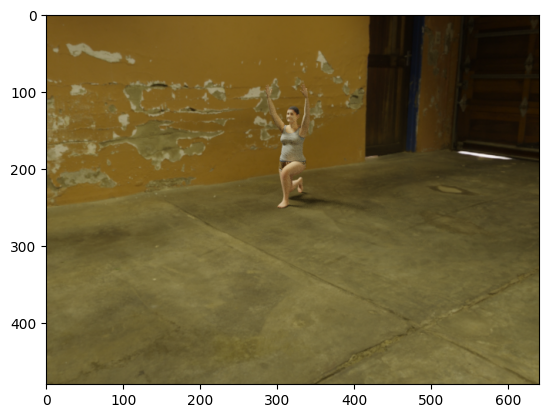

In [24]:
# Check whether the image still shows
plt.imshow(X_train[0])


In [25]:
X_train.shape


(8, 480, 640, 4)

## Target Encoding 🎯

> This might not be necessary as we are using tf.utils.immage_dataset_from.... to create our fixed numeric labels 😊

In [26]:
# Check this line to see what we pass to the One Hot Encoder
data_labels_tmp['pose_variation_enum']


NameError: name 'data_labels_tmp' is not defined

In [27]:
## unnecessary
# Setup the One Hot Encoder
data_labels_tmp = data_labels.copy()
# labels = ['squats', 'pushups', 'lunge_left', 'lunge_right']
ohe = OneHotEncoder()
ohe.fit(data_labels_tmp['pose_variation'])
data_labels_tmp = ohe.transform(data_labels_tmp['pose_variation'])


NameError: name 'data_labels' is not defined

# The CNN 🖥️🧠

In [28]:
# Check the shape of the current X_train
X_train.shape


(8, 480, 640, 4)

In [29]:
# Check y_train shape
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)
y_train_cat.shape


(8, 3)

## Initialization Function for the CNN 🦾🤖🦿

In [30]:
# Following line only needed if we have one instance of X_train
#X_train = np.expand_dims(X_train, axis=0)


In [31]:
#y_train.shape[-1]


### Function to Calculate what size to crop the images to 🥷

In [32]:
def calculate_cropping_min_max(images.csv):

    return width,height


SyntaxError: invalid syntax (2212092554.py, line 1)

### CNN Model Function 🦾💻🧠

In [57]:
def initialize_CNN():
    model = models.Sequential()

    # Preprocessing layers
    model.add(layers.CenterCrop(height=350, width=450, input_shape=X_train.shape[1:]))

    # Build of the Model
    model.add(layers.Conv2D(filters=8, kernel_size=(4,4), activation='relu', padding='same'))
    model.add(layers.MaxPool2D((2,2)))
    model.add(layers.Conv2D(16,(3,3), activation='relu'))
    model.add(layers.MaxPool2D((2,2)))

    model.add(layers.Flatten())
    model.add(layers.Dense(10, activation='relu'))
    model.add(layers.Dense(3, activation='softmax'))

    # Compilation of the Model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


In [58]:
# Summary of the CNN model
tmp_first_CNN = initialize_CNN()
tmp_first_CNN.summary()


Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 center_crop_5 (CenterCrop)  (None, 350, 450, 4)       0         
                                                                 
 conv2d_8 (Conv2D)           (None, 350, 450, 8)       520       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 175, 225, 8)       0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 173, 223, 16)      1168      
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 86, 111, 16)       0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 152736)          

In [61]:
es = EarlyStopping(patience=30, restore_best_weights=True)


In [62]:
history = tmp_first_CNN.fit(X_train, y_train_cat, validation_split=0.3, epochs=100, batch_size=2, callbacks=[es])


Epoch 1/100
3/3 [==============================] - 2s 330ms/step - loss: 6.1469 - accuracy: 0.0000e+00 - val_loss: 7.3278 - val_accuracy: 0.0000e+00
Epoch 2/100
3/3 [==============================] - 0s 99ms/step - loss: 2.6401 - accuracy: 0.4000 - val_loss: 1.0594 - val_accuracy: 0.6667
Epoch 3/100
3/3 [==============================] - 0s 94ms/step - loss: 1.0984 - accuracy: 0.4000 - val_loss: 1.0984 - val_accuracy: 0.3333
Epoch 4/100
3/3 [==============================] - 0s 90ms/step - loss: 1.0988 - accuracy: 0.0000e+00 - val_loss: 1.0974 - val_accuracy: 1.0000
Epoch 5/100
3/3 [==============================] - 0s 92ms/step - loss: 1.0987 - accuracy: 0.0000e+00 - val_loss: 1.0962 - val_accuracy: 0.3333
Epoch 6/100
3/3 [==============================] - 0s 98ms/step - loss: 1.0987 - accuracy: 0.0000e+00 - val_loss: 1.0952 - val_accuracy: 1.0000
Epoch 7/100
3/3 [==============================] - 0s 97ms/step - loss: 1.0985 - accuracy: 0.4000 - val_loss: 1.0944 - val_accuracy: 1.0000

In [63]:
y_test


,Pose
8,2
1,0


In [64]:
tmp_first_CNN.predict(X_test)


1/1 [==============================] - 0s 187ms/step


array([[0.34540948, 0.60694873, 0.04764181],
       [0.3675208 , 0.44910043, 0.18337871]], dtype=float32)

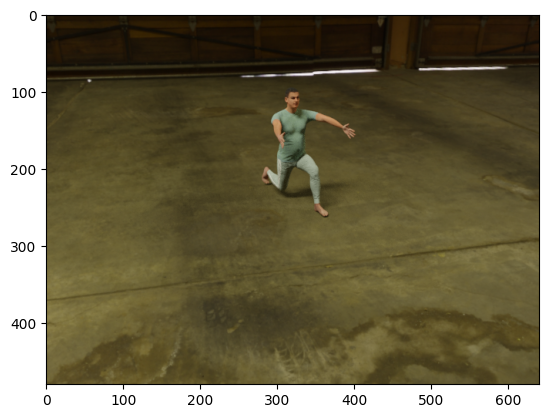

In [65]:
plt.imshow(X_test[1])
